<a href="https://colab.research.google.com/github/Aryanupadhyay23/Deep-Learning-/blob/main/butterfly_image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [298]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pycocotools import mask as coco_mask

In [299]:
with open('/content/_annotations.coco.json', 'r') as f:
    coco_data = json.load(f)
print(coco_data)

{'info': {'year': '2026', 'version': 'dataset', 'description': 'Exported from roboflow.com', 'contributor': '', 'url': 'https://app.roboflow.com/datasets/computer-vision-md8yv/dataset', 'date_created': '2026-02-17T13:54:18+00:00'}, 'licenses': [{'id': 1, 'url': '', 'name': 'Unknown'}], 'categories': [{'id': 0, 'name': 'objects', 'supercategory': 'none'}, {'id': 1, 'name': 'butterfly', 'supercategory': 'objects'}], 'images': [{'id': 0, 'license': 1, 'file_name': 'Screenshot 2026-02-17 191751_png.rf.5kaRcvahPlONJchKI0Y4.png', 'height': 513, 'width': 892, 'date_captured': '2026-02-17T13:54:18+00:00', 'extra': {'name': 'Screenshot 2026-02-17 191751.png'}}, {'id': 1, 'license': 1, 'file_name': 'Screenshot 2026-02-17 192235_png.rf.luEb1I3xN16nqtdnETtZ.png', 'height': 278, 'width': 398, 'date_captured': '2026-02-17T13:54:18+00:00', 'extra': {'name': 'Screenshot 2026-02-17 192235.png'}}], 'annotations': [{'id': 1, 'image_id': 0, 'category_id': 1, 'bbox': [45, 20, '800', '455'], 'area': 364000,

In [300]:
image_info = coco_data['images'][0]
print(image_info)

{'id': 0, 'license': 1, 'file_name': 'Screenshot 2026-02-17 191751_png.rf.5kaRcvahPlONJchKI0Y4.png', 'height': 513, 'width': 892, 'date_captured': '2026-02-17T13:54:18+00:00', 'extra': {'name': 'Screenshot 2026-02-17 191751.png'}}


In [301]:
image_path = f"{image_info['file_name']}"
print(image_path)

Screenshot 2026-02-17 191751_png.rf.5kaRcvahPlONJchKI0Y4.png


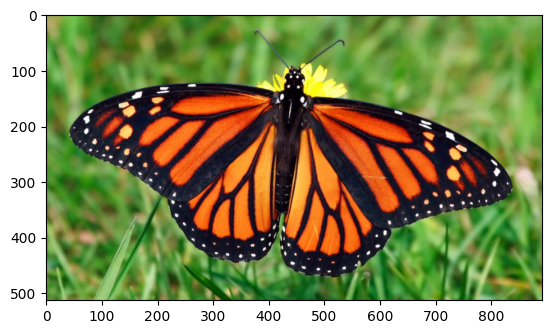

In [302]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [303]:
coco_data['annotations']

[{'id': 1,
  'image_id': 0,
  'category_id': 1,
  'bbox': [45, 20, '800', '455'],
  'area': 364000,
  'segmentation': {'counts': '_gf0f0W?7K4M3L6K3L3N3L3N2N1O2O1N101N1O2N1O3N1M3N2N2N2N2N1O2N100N3N2N2N2O1N2N101N101N10001O1O1N101O0O2O1N101N101O0O2O001N10001N10000000001N10001N1000000O2O00O02O000O101O00001O00000O101O001O010N1000001O01OO2O1O1O001O1O2N2M2O2N2M2O2M2O1N2O1N2O1N2O1O001O001N2O0O2O1N101N101O0O101O001N1O101N2O001O000O2O00001O00001O0000000000001O0000001O000000001O001O1O0^FTJo8m5lF[JP9f5mF_JP9b5mFaJR9X6O2N001O1O1O2N3M2N1O2N1O1O2N2N2N2N2N1O2N1O1O1O1O2N1O1O001O1O2N1O001O1O1O2N2O1N1O2N1O1O1ObHhHT6W7lIiHU6V7kIjHV6U7\\1O1O1O1N101O001O1O001O001O00001O1O1O1O001O1O002N1O1O1O10O02M201N1O0O200O001N110N110O1N110O001O000O20O01O0O1010OO110O001N1010OO11OO20O0001N110O0000001O000001O00000000000000001ORMTFGl96YFHg96]FHc97_FHa97bFG^98dFG\\98eFH[97gFIX96jFIV97jFIU97mFHS98mFIR96oFJQ96PGIP97PGIP97PGJn86SGJm86TGIl87TGIl87UGHj89VGGi8:XGEh8;XGFf8<ZGCf8=[GBd8?^G_Oa8b0bG[O]8g0dGWO[8j0fGUOX8n0iGPOV8Q1lGmNS8U1

In [304]:
annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == image_info['id']]
annotations

[{'id': 1,
  'image_id': 0,
  'category_id': 1,
  'bbox': [45, 20, '800', '455'],
  'area': 364000,
  'segmentation': {'counts': '_gf0f0W?7K4M3L6K3L3N3L3N2N1O2O1N101N1O2N1O3N1M3N2N2N2N2N1O2N100N3N2N2N2O1N2N101N101N10001O1O1N101O0O2O1N101N101O0O2O001N10001N10000000001N10001N1000000O2O00O02O000O101O00001O00000O101O001O010N1000001O01OO2O1O1O001O1O2N2M2O2N2M2O2M2O1N2O1N2O1N2O1O001O001N2O0O2O1N101N101O0O101O001N1O101N2O001O000O2O00001O00001O0000000000001O0000001O000000001O001O1O0^FTJo8m5lF[JP9f5mF_JP9b5mFaJR9X6O2N001O1O1O2N3M2N1O2N1O1O2N2N2N2N2N1O2N1O1O1O1O2N1O1O001O1O2N1O001O1O1O2N2O1N1O2N1O1O1ObHhHT6W7lIiHU6V7kIjHV6U7\\1O1O1O1N101O001O1O001O001O00001O1O1O1O001O1O002N1O1O1O10O02M201N1O0O200O001N110N110O1N110O001O000O20O01O0O1010OO110O001N1010OO11OO20O0001N110O0000001O000001O00000000000000001ORMTFGl96YFHg96]FHc97_FHa97bFG^98dFG\\98eFH[97gFIX96jFIV97jFIU97mFHS98mFIR96oFJQ96PGIP97PGIP97PGJn86SGJm86TGIl87TGIl87UGHj89VGGi8:XGEh8;XGFf8<ZGCf8=[GBd8?^G_Oa8b0bG[O]8g0dGWO[8j0fGUOX8n0iGPOV8Q1lGmNS8U1

In [305]:
image_info

{'id': 0,
 'license': 1,
 'file_name': 'Screenshot 2026-02-17 191751_png.rf.5kaRcvahPlONJchKI0Y4.png',
 'height': 513,
 'width': 892,
 'date_captured': '2026-02-17T13:54:18+00:00',
 'extra': {'name': 'Screenshot 2026-02-17 191751.png'}}

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
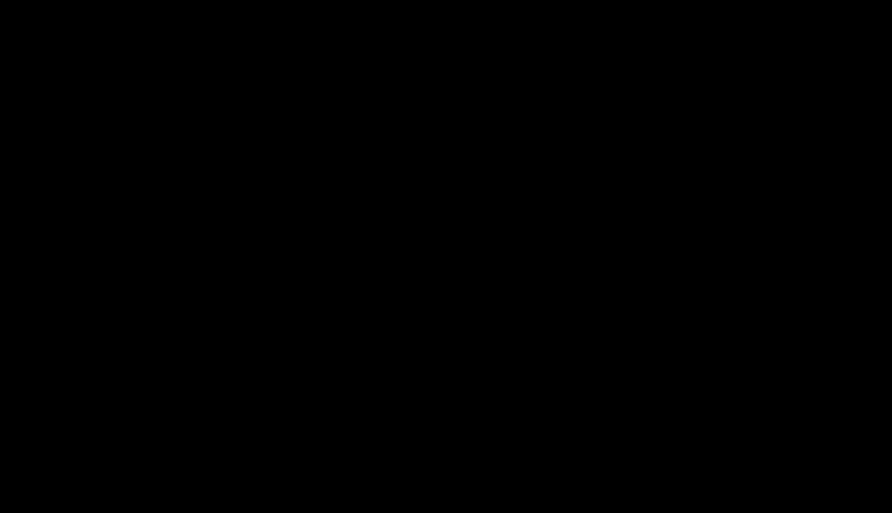

In [306]:
mask = np.zeros((image_info['height'], image_info['width']), dtype=np.uint8)
mask

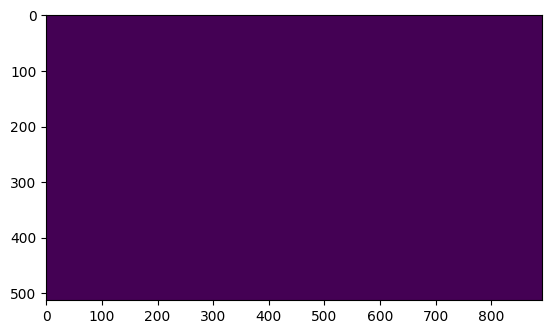

In [307]:
plt.imshow(mask)

In [308]:
segmentation2 = [[44,
    204,
    44,
    222,
    67,
    245,
    145,
    279,
    216,
    328,
    229,
    366,
    254,
    402,
    293,
    433,
    336,
    444,
    375,
    442,
    394,
    433,
    407,
    413,
    423,
    422,
    425,
    438,
    436,
    454,
    469,
    467,
    521,
    470,
    551,
    461,
    608,
    416,
    621,
    384,
    639,
    381,
    715,
    354,
    797,
    342,
    823,
    331,
    838,
    312,
    830,
    286,
    797,
    250,
    726,
    206,
    632,
    172,
    557,
    155,
    486,
    148,
    482,
    142,
    476,
    142,
    470,
    126,
    470,
    89,
    525,
    50,
    536,
    55,
    537,
    49,
    532,
    45,
    523,
    47,
    464,
    91,
    449,
    96,
    437,
    95,
    403,
    53,
    398,
    53,
    398,
    47,
    388,
    34,
    376,
    27,
    375,
    35,
    391,
    44,
    425,
    87,
    414,
    136,
    318,
    124,
    253,
    124,
    173,
    133,
    124,
    147,
    80,
    166,
    62,
    180]]

In [309]:
for seg in segmentation2:
  print(np.array(seg).reshape((len(seg)//2), 2))

[[ 44 204]
 [ 44 222]
 [ 67 245]
 [145 279]
 [216 328]
 [229 366]
 [254 402]
 [293 433]
 [336 444]
 [375 442]
 [394 433]
 [407 413]
 [423 422]
 [425 438]
 [436 454]
 [469 467]
 [521 470]
 [551 461]
 [608 416]
 [621 384]
 [639 381]
 [715 354]
 [797 342]
 [823 331]
 [838 312]
 [830 286]
 [797 250]
 [726 206]
 [632 172]
 [557 155]
 [486 148]
 [482 142]
 [476 142]
 [470 126]
 [470  89]
 [525  50]
 [536  55]
 [537  49]
 [532  45]
 [523  47]
 [464  91]
 [449  96]
 [437  95]
 [403  53]
 [398  53]
 [398  47]
 [388  34]
 [376  27]
 [375  35]
 [391  44]
 [425  87]
 [414 136]
 [318 124]
 [253 124]
 [173 133]
 [124 147]
 [ 80 166]
 [ 62 180]]


In [310]:
def create_binary_mask(segmentation, height, width):
    """
    Convert COCO segmentation (polygon or RLE) to binary mask.

    Parameters:
        segmentation : list or dict
        height       : image height
        width        : image width

    Returns:
        mask (H, W) numpy array (uint8)
    """

    # Case 1: Polygon format
    if isinstance(segmentation, list):
        mask = np.zeros((height, width), dtype=np.uint8)

        for seg in segmentation:
            poly = np.array(seg).reshape(-1, 2)
            cv2.fillPoly(mask, [np.int32(poly)], 1)

        return mask

    # Case 2: RLE format
    elif isinstance(segmentation, dict) and 'counts' in segmentation:

        # If compressed RLE (counts is string)
        if isinstance(segmentation['counts'], str):
            rle = segmentation

        # If uncompressed RLE (counts is list)
        else:
            rle = coco_mask.frPyObjects(segmentation, height, width)

        mask = coco_mask.decode(rle)

        # Sometimes decode returns HxWx1
        if len(mask.shape) == 3:
            mask = mask[:, :, 0]

        return mask.astype(np.uint8)

    else:
        raise ValueError("Unsupported segmentation format")


def build_combined_mask(annotations, image_height, image_width):
    """
    Combine all annotation masks into one final binary mask.
    """

    combined_mask = np.zeros((image_height, image_width), dtype=np.uint8)

    for ann in annotations:
        binary_mask = create_binary_mask(
            ann['segmentation'],
            image_height,
            image_width
        )

        combined_mask = np.maximum(combined_mask, binary_mask)

    return combined_mask


final_mask = build_combined_mask(
    annotations,
    image_info['height'],
    image_info['width']
)

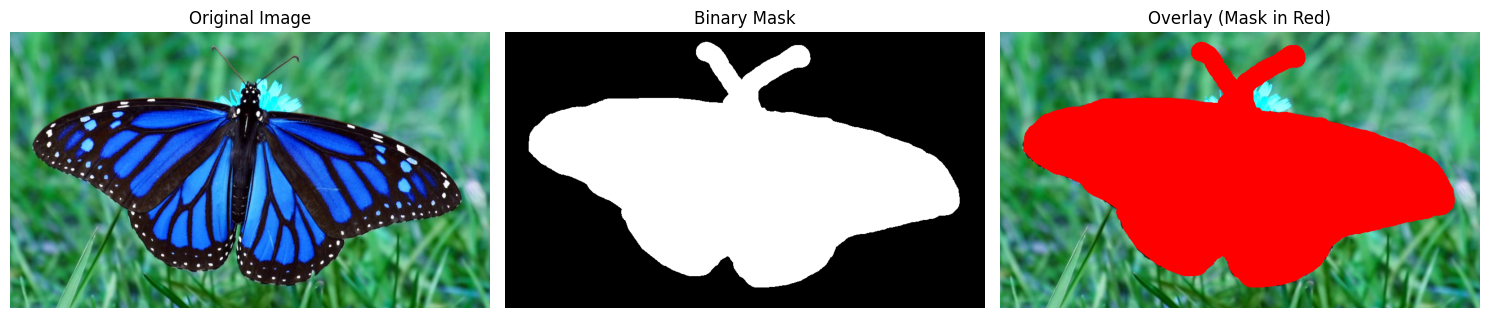

In [311]:
# If image was read using cv2, convert BGR → RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Binary Mask
plt.subplot(1, 3, 2)
plt.imshow(final_mask, cmap="gray")
plt.title("Binary Mask")
plt.axis("off")

# Overlay (Image + Mask)
overlay = image_rgb.copy()
overlay[final_mask == 1] = [255, 0, 0]  # red mask

plt.subplot(1, 3, 3)
plt.imshow(overlay)
plt.title("Overlay (Mask in Red)")
plt.axis("off")

plt.tight_layout()
plt.show()


In [312]:
mask_to_save = (final_mask * 255).astype(np.uint8)
cv2.imwrite("binary_mask.png", mask_to_save)

True